# FAKE NEWS DETECTION

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn import feature_extraction, linear_model, model_selection, preprocessing
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline

## 1. READ DATASETS

In [3]:
fakenews = pd.read_csv(r"C:\Users\vaish\Downloads\Fake News Detection\Fake.csv")
truenews = pd.read_csv(r"C:\Users\vaish\Downloads\Fake News Detection\True.csv")

In [4]:
fakenews.shape

(23481, 4)

In [6]:
truenews.shape

(21417, 4)

## 2. DATA CLEANING

In [10]:
fakenews['target'] = 'fake'
truenews['target'] = 'true'

In [11]:
data = pd.concat([fakenews, truenews]).reset_index(drop = True)
data.shape

(44898, 5)

In [12]:
from sklearn.utils import shuffle
data = shuffle(data)
data = data.reset_index(drop=True)

In [13]:
data.head()

,title,text,subject,date,target
0,Trump's tax cut won't be the biggest in U.S. h...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017",true
1,Trump opposes including Obamacare subsidies in...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 26, 2017",true
2,Highlights: The Trump presidency on April 13 a...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,"April 13, 2017",true
3,"United States, China to meet on North Korea on...",WASHINGTON (Reuters) - U.S. and Chinese diplom...,politicsNews,"June 15, 2017",true
4,French foreign minister in Libya to push peace...,TRIPOLI (Reuters) - France s Foreign Minister ...,worldnews,"September 4, 2017",true


In [14]:
data.drop(["date"],axis=1,inplace=True)
data.head()

,title,text,subject,target
0,Trump's tax cut won't be the biggest in U.S. h...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,true
1,Trump opposes including Obamacare subsidies in...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,true
2,Highlights: The Trump presidency on April 13 a...,(Reuters) - Highlights for U.S. President Dona...,politicsNews,true
3,"United States, China to meet on North Korea on...",WASHINGTON (Reuters) - U.S. and Chinese diplom...,politicsNews,true
4,French foreign minister in Libya to push peace...,TRIPOLI (Reuters) - France s Foreign Minister ...,worldnews,true


In [15]:
data.drop(["title"],axis=1,inplace=True)
data.head()

,text,subject,target
0,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,true
1,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,true
2,(Reuters) - Highlights for U.S. President Dona...,politicsNews,true
3,WASHINGTON (Reuters) - U.S. and Chinese diplom...,politicsNews,true
4,TRIPOLI (Reuters) - France s Foreign Minister ...,worldnews,true


In [16]:
data['text'] = data['text'].apply(lambda x: x.lower())
data.head()

,text,subject,target
0,washington (reuters) - president donald trump ...,politicsNews,true
1,washington (reuters) - u.s. president donald t...,politicsNews,true
2,(reuters) - highlights for u.s. president dona...,politicsNews,true
3,washington (reuters) - u.s. and chinese diplom...,politicsNews,true
4,tripoli (reuters) - france s foreign minister ...,worldnews,true


In [17]:
import string
def punctuation_removal(text):
    all_list = [char for char in text if char not in string.punctuation]
    clean_str = ''.join(all_list)
    return clean_str
data['text'] = data['text'].apply(punctuation_removal)

In [18]:
data.head()

,text,subject,target
0,washington reuters president donald trump rep...,politicsNews,true
1,washington reuters us president donald trump ...,politicsNews,true
2,reuters highlights for us president donald tr...,politicsNews,true
3,washington reuters us and chinese diplomatic ...,politicsNews,true
4,tripoli reuters france s foreign minister jea...,worldnews,true


In [19]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop = stopwords.words('english')

data['text'] = data['text'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stop)]))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vaish\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


In [20]:
data.head()

,text,subject,target
0,washington reuters president donald trump repe...,politicsNews,true
1,washington reuters us president donald trump a...,politicsNews,true
2,reuters highlights us president donald trump’s...,politicsNews,true
3,washington reuters us chinese diplomatic defen...,politicsNews,true
4,tripoli reuters france foreign minister jean y...,worldnews,true


## 3. EXPLORATORY ANALYSIS

subject
Government News     1570
Middle-east          778
News                9050
US_News              783
left-news           4459
politics            6841
politicsNews       11272
worldnews          10145
Name: text, dtype: int64


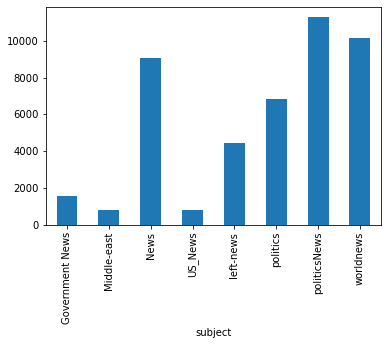

In [21]:
print(data.groupby(['subject'])['text'].count())
data.groupby(['subject'])['text'].count().plot(kind="bar")
plt.show()

target
fake    23481
true    21417
Name: text, dtype: int64


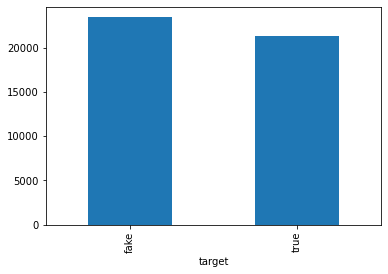

In [22]:
print(data.groupby(['target'])['text'].count())
data.groupby(['target'])['text'].count().plot(kind="bar")
plt.show()

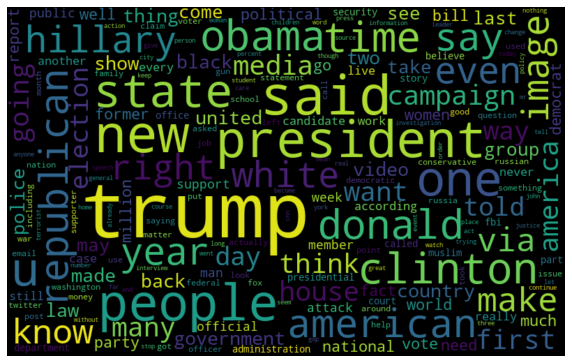

In [27]:
from wordcloud import WordCloud
fake_data = data[data["target"] == "fake"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500,max_font_size = 110,collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

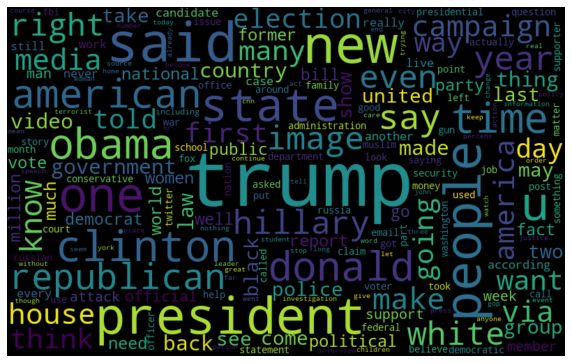

In [28]:
from wordcloud import WordCloud
real_data = data[data["target"] == "true"]
all_words = ' '.join([text for text in fake_data.text])
wordcloud = WordCloud(width= 800, height= 500, max_font_size = 110, collocations = False).generate(all_words)
plt.figure(figsize=(10,7))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [29]:
from nltk import tokenize
token_space = tokenize.WhitespaceTokenizer()
def counter(text, column_text, quantity):
    all_words = ' '.join([text for text in text[column_text]])
    token_phrase = token_space.tokenize(all_words)
    frequency = nltk.FreqDist(token_phrase)
    df_frequency = pd.DataFrame({"Word": list(frequency.keys()),"Frequency": list(frequency.values())})
    df_frequency = df_frequency.nlargest(columns = "Frequency", n = quantity)
    plt.figure(figsize=(12,8))
    ax = sns.barplot(data = df_frequency, x = "Word", y = "Frequency", color = 'blue')
    ax.set(ylabel = "Count")
    plt.xticks(rotation='vertical')
    plt.show()

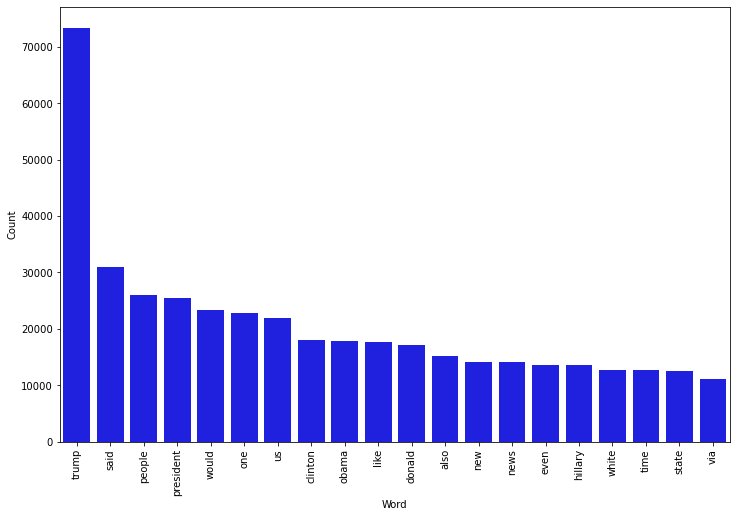

In [30]:
counter(data[data["target"] == "fake"], "text", 20)

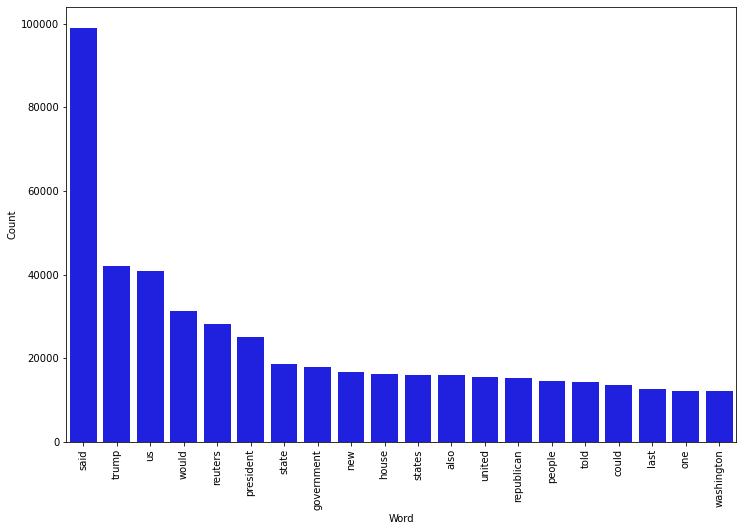

In [31]:
counter(data[data["target"] == "true"], "text", 20)

## 4. MODELING

In [32]:
from sklearn import metrics
import itertools
def plot_confusion_matrix(cm, classes,normalize=False,title='Confusion matrix',cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],horizontalalignment="center",color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [34]:
x_tr,x_te,y_tr,y_te = train_test_split(data['text'], data.target, test_size=0.2, random_state=42)

# **NAIVE BAYES CLASSIFIER**

In [35]:
dct = dict()
from sklearn.naive_bayes import MultinomialNB
NB_classifier = MultinomialNB()
pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('model', NB_classifier)])
model = pipe.fit(X_train, y_train)
prediction = model.predict(X_test)
print("accuracy: {}%".format(round(accuracy_score(y_test, prediction)*100,2)))
dct['Naive Bayes'] = round(accuracy_score(y_test, prediction)*100,2)

accuracy: 95.26%


Confusion matrix, without normalization


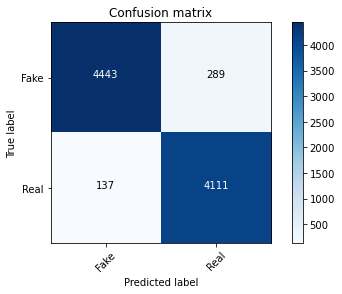

In [36]:
cm = metrics.confusion_matrix(y_test, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **LOGISTIC REGRESSION**

In [38]:
from sklearn.linear_model import LogisticRegression
pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('model', LogisticRegression())])
model = pipe.fit(x_tr, y_tr)
prediction = model.predict(x_te)
print("accuracy: {}%".format(round(accuracy_score(y_te, prediction)*100,2)))
dct['Logistic Regression'] = round(accuracy_score(y_te, prediction)*100,2)

accuracy: 98.82%


Confusion matrix, without normalization


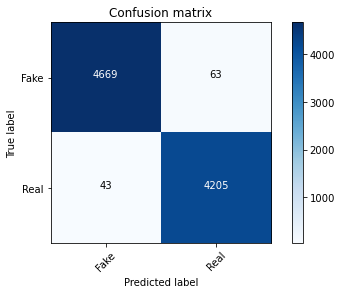

In [39]:
cm = metrics.confusion_matrix(y_te, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **DECISION TREE CLASSIFIER**

In [40]:
from sklearn.tree import DecisionTreeClassifier
pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('model', DecisionTreeClassifier(criterion= 'entropy', max_depth = 20, splitter='best', random_state=42))])
model = pipe.fit(x_tr, y_tr)
prediction = model.predict(x_te)
print("accuracy: {}%".format(round(accuracy_score(y_te, prediction)*100,2)))
dct['Decision Tree'] = round(accuracy_score(y_te, prediction)*100,2)

accuracy: 99.68%


Confusion matrix, without normalization


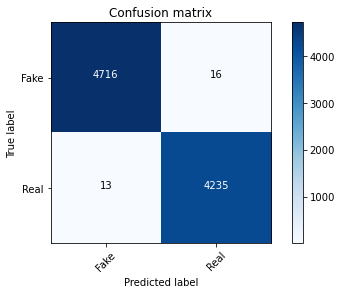

In [41]:
cm = metrics.confusion_matrix(y_te, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **RANDOM FOREST CLASSIFIER**

In [42]:
from sklearn.ensemble import RandomForestClassifier
pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('model', RandomForestClassifier(n_estimators=50, criterion="entropy"))])
model = pipe.fit(x_tr, y_tr)
prediction = model.predict(x_te)
print("accuracy: {}%".format(round(accuracy_score(y_te, prediction)*100,2)))
dct['Random Forest'] = round(accuracy_score(y_te, prediction)*100,2)

accuracy: 99.08%


Confusion matrix, without normalization


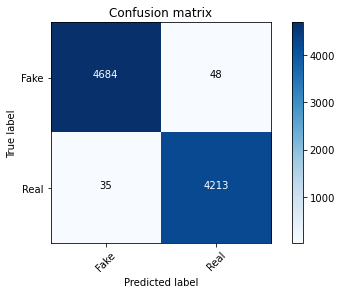

In [43]:
cm = metrics.confusion_matrix(y_te, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

## **SVM CLASSIFIER**

In [44]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
pipe = Pipeline([('vect', CountVectorizer()),('tfidf', TfidfTransformer()),('model', clf)])
model = pipe.fit(x_tr, y_tr)
prediction = model.predict(x_te)
print("accuracy: {}%".format(round(accuracy_score(y_te, prediction)*100,2)))
dct['SVM'] = round(accuracy_score(y_te, prediction)*100,2)

accuracy: 99.6%


Confusion matrix, without normalization


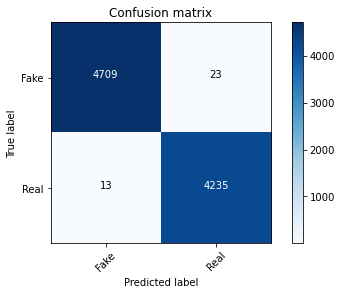

In [45]:
cm = metrics.confusion_matrix(y_te, prediction)
plot_confusion_matrix(cm, classes=['Fake', 'Real'])

# **FINAL CONCLUSION**

([<matplotlib.axis.YTick at 0x2e8c6860160>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

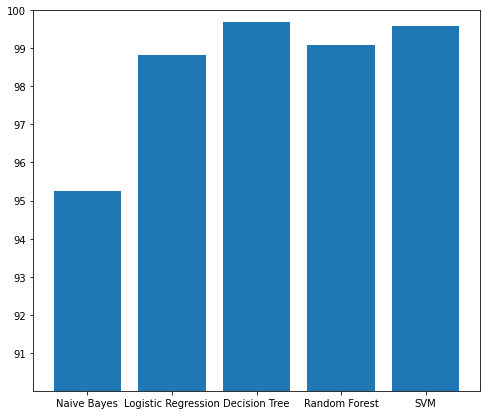

In [46]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8,7),set_xlabel="white",set_ylabel="white")
plt.bar(list(dct.keys()),list(dct.values()))
plt.ylim(90,100)
plt.yticks((91, 92, 93, 94, 95, 96, 97, 98, 99, 100))